# Sor és cella magic-ek

A Jupyter notebookokban lehetőség van sor és cella magic-ekkel néhány, a pythonon ( vagy az épp aktuális notebook kernelen ) túlmutató segéd művelet elvégzésére. 
A sor magic-ek hatása a kód cella egyetlen sorában érvényesül míg a cella magic-ek hatása a teljes cellára kiterjednek. Egy darab `%`-al jelöljük a sor illetve `%%`-al a cella meagiceket. 
A félév során már rendszeresen használtuk a `% pylab inline` konstrukciót mely a notebook környezetet úgy állította be, hogy a `matplotlib` és `numpy` csomagokból betöltötte a leggyakrabban használt függvényeket, továbbá a matplotlib által generált ábrákat beágyazta a notebookba. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[Ezen](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) és [ezen](http://ipython.readthedocs.io/en/stable/interactive/magics.html?highlight=magic) a linken a magic-ekről további leírásokat találhatunk.
Hogy az éppen aktuális környezetben milyen magic-ek állnak rendelkezésünkre azt az `%lsmagic` sor magic-el tudjuk megnézni:

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%

A magic-ek-et tartalmazó sorokba ne írjunk kommenteket. Ezekbe a sorokba írt kommentek hibát fognak okozni!
Az alábbiakban tekintsünk át néhány hasznos magic-et a fenti listából. 

## %who  : az aktuális globális változók listázása

In [3]:
# definiáljunk pár dolgot
one = "for the money"
two = "for the show"
three = "to get ready now go cat go" 
szam1 = 1.0
szam2 = 3
szam3 = 4.0

In [4]:
%who

one	 szam1	 szam2	 szam3	 three	 two	 


Ha csak bizonyos típusú objektumokra vagyun kiváncsiak akkor a típus megadásával szűkíthetjük a listát:

In [5]:
%who str

one	 three	 two	 


## %time és  %timeit : egyszerű időmérés

A `%time` és `%timeit` sor magic-ek egy kódsor futási idejéről nyújtanak információt. Mind a két magic sor és cella magic ként is működik. 
A `%time` az adott kódrészletet egyszer futtatja le és kiírja, hogy ezalatt mennyi idő telt. Az alábbi példában 0 és 10000 közötti számokból generálunk egy listát és megnézzük hogy ehez mennyi időre volt szükség:

In [6]:
%time a=[ i for i in range(100000) ]

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.1 ms


A `%timeit` magic egy adott kódrészletet többször is lefuttat és a futások végén a leggyorsabb futások átlagát írja ki. 

In [7]:
%timeit a=[ i for i in range(100000) ]

100 loops, best of 3: 10.6 ms per loop


A fenti konstrukció, amint azt ki is írja, 100-szor futtatja le a megmérendő kódrészletet és a legjobb három futás átlagát írja ki. 
A magic-ek lehetséges opcióiról notebookban szokásos `?`-el tudunk tájékozódni. 

In [8]:
?timeit

## %%writefile :  cella tartalmának kiírása egy file-ba

A `%%writefile` cella magic seegítségével az adott cella tartalmát tudjuk egy file-ba kiírni. 


In [9]:
%%writefile kicsiadat.dat

1 2
2 3
3 1
4 6
5 7

Overwriting kicsiadat.dat


## Más nyelven írt kódrszletek integrálása 

A magic-ek egyik talán legérdekesebb felhasználási módja, hogy segítségükkel egy `python` nyelven írt notebook-ba más nyelveken írt kód cellákat is használhatunk. Ezen más nyelveken írt kód részletek definiálhatnak függvényeket, illetve kölcsönhathatnak a `python`-os részletekben definiált változókkal. 
Nézzünk egy pár példát arra, hogy hogyan lehet más nyelveken íródott kódrészleteket használni.
Először is egy egyszerű `bash` nyelven íródott kis script-et nézünk meg, ami kiírja a számokat 1-től 5-ig:

In [10]:
%%bash 
for i in `seq 5`;
do
   echo "i is $i"
done

i is 1
i is 2
i is 3
i is 4
i is 5


A fenti kódcella első sora hatására egy `bash` értelmező fordítja le a kód cella mardék részét.

A következő két példában `fortran` és `R` nyelveken íródott kódrészleteket fogunk használni. Először is a `%load_ext` sor magic segítségével a `fortran` és `R` cella magic-eket be kell tölteni hogy aztán később használni tudjuk:

In [11]:
# R cell magic betöltése
%load_ext rpy2.ipython 
# fortran cell magic betöltése
%load_ext fortranmagic 

/opt/conda/lib/python3.5/site-packages/IPython/utils/path.py:264: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module
  warn("get_ipython_cache_dir has moved to the IPython.paths module")


Definiáljunk most pár változót `python`-ban:

In [12]:
# ez it két változó ezeket fogjuk az alábbi példákban használni
x=linspace(0,pi,100)
y=sin(x)

Ábrázoljuk most az `y` változót az `x` függvényében az `R` nyelv `ggplot` csomagjában található `qplot` függvény segítségével:

/opt/conda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


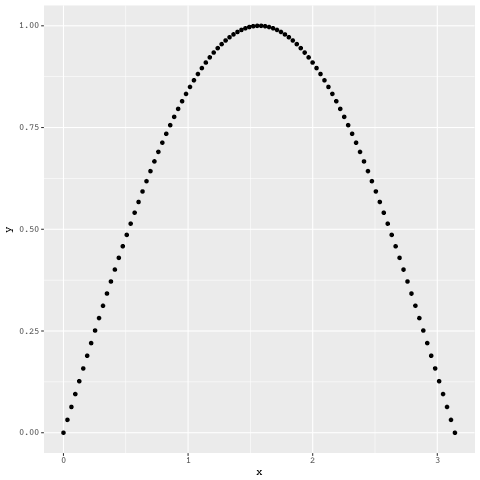

In [13]:
%%R -i x,y         
# Így kell az R magic-nek megmondani hogy a pythonban definiált x és y változókat használja
require(ggplot2)   # R-ban így töltjük be az ábrázolásért felelős csomagot
qplot(x,y)         # Ez egy egyszerű ábrázolás

Az alábbi kódrészletben pedig `fortran` nyelven definiálunk egy függvényt aminek három változója van , két bemeneti (u és v) és egy kimeneti (w). A kimeneti érték a bemeneti értékek összegének a sinus-a:

In [15]:
%%fortran
       subroutine fort_funct(u, v, w)
            real, intent(in) :: u(:), v(:)  !ezek bemeno valtozok
            real, intent(out) :: w(size(u)) !ez lesz a kimeno valtozo
            ! using vector operations
            w(:) = sin(u(:) + v(:))
       end subroutine


Most a fent definiált `fortran` függvényt használjuk a python-ban definiált `x` és `y` array-kel:

In [16]:
fort_funct(x,y) # Ezt a függvényt Fortranban definiáltuk!!!

array([  0.00000000e+00,   6.34186044e-02,   1.26550198e-01,
         1.89110100e-01,   2.50818312e-01,   3.11401665e-01,
         3.70596170e-01,   4.28148836e-01,   4.83819753e-01,
         5.37383854e-01,   5.88632405e-01,   6.37374401e-01,
         6.83437765e-01,   7.26670444e-01,   7.66940951e-01,
         8.04138899e-01,   8.38175297e-01,   8.68982673e-01,
         8.96515131e-01,   9.20747399e-01,   9.41674888e-01,
         9.59312618e-01,   9.73694384e-01,   9.84872043e-01,
         9.92913723e-01,   9.97903109e-01,   9.99937952e-01,
         9.99128520e-01,   9.95596349e-01,   9.89472628e-01,
         9.80896771e-01,   9.70014811e-01,   9.56978321e-01,
         9.41942632e-01,   9.25065696e-01,   9.06506658e-01,
         8.86424959e-01,   8.64978611e-01,   8.42324078e-01,
         8.18614662e-01,   7.93999493e-01,   7.68623590e-01,
         7.42626727e-01,   7.16142833e-01,   6.89299405e-01,
         6.62217736e-01,   6.35012090e-01,   6.07790053e-01,
         5.80651700e-01,